In [1]:
import numpy as np # Load the numpy library
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [2]:
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans serif'
rcp['font.size'] = 18

In [3]:
cases = np.loadtxt('datos_covid/diario_estado.csv', delimiter=',') # Loads cases file

In [4]:
time = cases[0, :]
time = np.ma.masked_invalid(time)

In [5]:
# Loads time mm,dd,yyyy HH,mm
time_final = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                

In [6]:
time_final = np.ma.masked_equal(time_final, 0)

In [7]:
cases = np.ma.masked_invalid(cases) # Get rid of invalid values

In [8]:
# Check METADATA to see number and state
meta = open('datos_covid/metadata_diario_estado.txt','r').read() # Baja California is 2

In [9]:
number_state = cases[:,0]
index = np.where(number_state == 2)[0][0]
print(index)

2


In [10]:
# Choose a state
cases_st_bc = cases[index, :]

In [11]:
print(cases_st_bc[3:].shape)
print(time_final[3:].shape)

(200,)
(200,)


(737425.0, 737669.0)

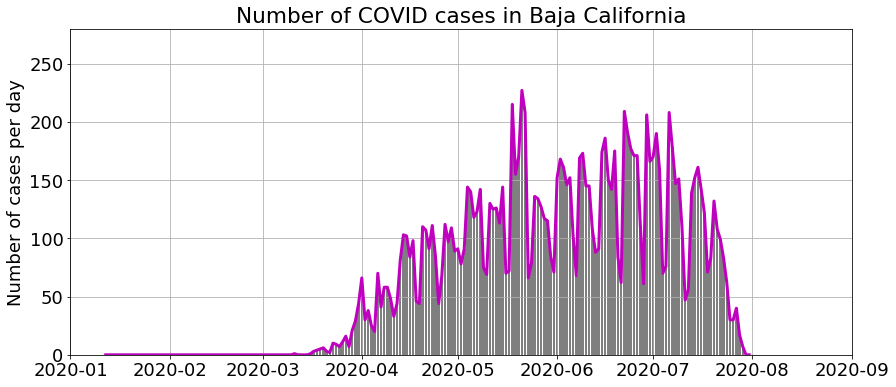

In [12]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Number of COVID cases in Baja California'
units = 'Number of cases per day'
ax.plot(num2date(time_final[1:]), cases_st_bc[1:], lw=3, color='m')
ax.bar(time_final[1:], cases_st_bc[1:], color='k', alpha=0.5)
ax.set_title(tit)
ax.set_ylabel(units)
ax.set_ylim(0, 280)
ax.grid()
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax.set_xlim(fi1, fi2)
# plt.savefig('figuras/Figura_Estado_Baja_California.png', bbox_inches='tight')

In [13]:
# Now plot the number of covid cases in your state